# Linear Least Squares

Linear least-squares, also known as ordinary linear regression, is a
basic optimization problem used for data fitting. It’s also a
fundamental building block for algorithms meant for more general
problems.

> **Packages used by this page**
>
> This page uses the following packages:
>
> -   CSV
> -   RDatasets
> -   GLM
> -   Statistics
> -   StatsPlots
> -   LinearAlgebra
> -   DataFrames
> -   DataFramesMeta
> -   Downloads

## Example: Multilinear regression

We begin with a simple example and use linear regression to build a
model that relates the fuel efficiency of a car with its weight, engine
displacement, and engine horsepower. Load the
[`mtcars`](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/mtcars.html)
dataset provided in the
[`Rdatasets.jl`](https://github.com/JuliaStats/RDatasets.jl) package:

In [ ]:
# import Pkg; 
# Pkg.add("RDatasets")
# Pkg.add("CSV")
# Pkg.add("GLM")
# Pkg.add("Statistics")
# Pkg.add("StatsPlots")
# Pkg.add("LinearAlgebra")
# Pkg.add("DataFrames")
# Pkg.add("DataFramesMeta")
# Pkg.add("Downloads")

In [1]:
using RDatasets
mtcars = RDatasets.dataset("datasets", "mtcars");

Here are the first five rows of the dataset:

In [2]:
println("Number of rows: ", size(mtcars, 1))
first(mtcars, 5)

Number of rows: 32


Row,Model,MPG,Cyl,Disp,HP,DRat,WT,QSec,VS,AM,Gear,Carb
,String31,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Int64,Int64,Int64,Int64
1,Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0,1,4,4
2,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4
3,Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2


The model we wish to build aims to find coefficients
$x_1,\ldots,x_4\in\R$ such that for each particular car model
$i=1,2,\ldots,m$ (where $m$ is the number of rows),

$$
\text{MPG}_i \approx x_1 + x_2\cdot\text{Disp}_i + x_3\cdot\text{HP}_i + x_4\cdot\text{WT}_i.
$$

Of course, we shouldn’t expect an exact match for all car models $i$,
and instead the coefficients $x_1,\ldots,x_4$ computed by ordinary
linear regression minimizes the sum of least-squares deviations:

<span id="eq-mpg-ls">$$
\min_{x_1,\ldots,x_4}\ \sum_{i=1}^{m} (x_1 + x_2\cdot\text{Disp}_i + x_3\cdot\text{HP}_i + x_4\cdot\text{WT}_i - \text{MPG}_i)^2.
 \qquad(1)$$</span>

Because this is such an important problem in general, there exists
excellent software packages that make formulating and solving these
problems easy. Here’s how to do it using the generalized linear models
package [GLM.jl](https://juliastats.org/GLM.jl/stable/):

In [3]:
using GLM
ols = lm(@formula(MPG ~ Disp + HP + WT), mtcars)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MPG ~ 1 + Disp + HP + WT

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)  37.1055        2.11082    17.58    <1e-15  32.7817     41.4293
Disp         -0.000937009   0.0103497  -0.09    0.9285  -0.0221375   0.0202635
HP           -0.0311566     0.0114358  -2.72    0.0110  -0.0545817  -0.00773139
WT           -3.80089       1.06619    -3.56    0.0013  -5.98488    -1.6169
───────────────────────────────────────────────────────────────────────────────

The column marked `Coef.` shows the values for the 4 computed
coefficients $x_1,\ldots,x_4$ (labeled `(Intercept)`, `Disp`, `HP`, and
`WT`). The remaining columns show the results for various statistical
tests that indicate the reliability of each coefficient It appears that
the car’s weight has the biggest impact on fuel economy. This plot shows
the projection of the data and the regression line onto the plane
spanned by `WT` and `MPG`:

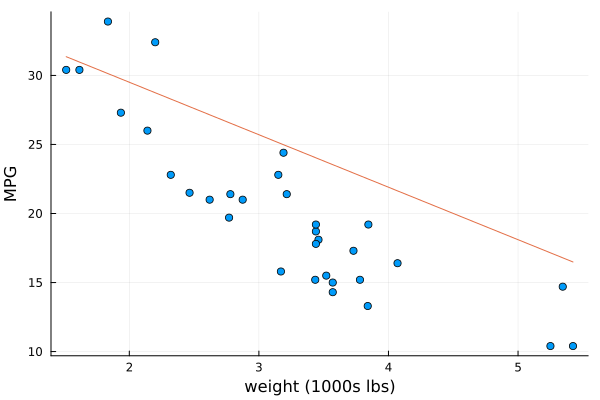

In [4]:
using StatsPlots
x₁, x₂, x₃, x₄ = coef(ols)
@df mtcars scatter(:WT, :MPG, xlabel="weight (1000s lbs)", ylabel="MPG", leg=false)
@df mtcars plot!(:WT, x₁ .+ x₄*:WT)

### Matrix formulation

The objective in <a href="#eq-mpg-ls" class="quarto-xref">Equation 1</a>
can be written using matrix notation, as follows: define the data matrix
$A$, the vector of observations $b$, and the regression coefficients $x$
as 

$$
A = \begin{bmatrix}
  1 & \text{WT}_1 & \text{Disp}_1 & \text{HP}_1
\\\vdots & \vdots & \vdots & \vdots
\\1 & \text{WT}_m & \text{Disp}_m & \text{HP}_m
\end{bmatrix},
\quad
b = \begin{bmatrix} \text{MPG}_1 \\ \vdots \\ \text{MPG}_m \end{bmatrix},
\quad
x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}.
$$ 

For the `mtcars` dataset, there are $m=32$ rows (observations) and
$n=4$ regressors (variables). Thus, the least-squares solution $x^*$
minimizes the 2-norm squared $\|r\|^2$ of the residual $r = b - Ax$.
**Euclidian norm**
The Euclidian norm, or 2-norm, of a vector $z\in\R^n$ is the function
$$
\|z\|_2 = \sqrt{z_1^2+\cdots+z_n^2}.
$$
This norm has the property that 

$$
z \ T z = \begin{bmatrix} z_1\\\vdots\\ z_n\end{bmatrix}\ T
       \begin{bmatrix} z_1\\\vdots\\ z_n\end{bmatrix}
     = \sum_{i=1}^n z_i^2 = \|z\|_2^2.
$$ 
We often leave out the subscript and simply write $\|z\|$ for the 2-norm, unless warned otherwise.

In [5]:
<!-- ## Linear systems

Consider the problem of solving the linear system of equations
$$ Ax = b, $$
where $A \in \R^{m\times n}$ and $b\in\R^{m}$. Then we say this system is

 1. overdetermined if $m>n$,
 2. underdetermined if $m< n$, or
 3. square if $m = n$.

A linear system can have exactly one solution, many solutions, or no solutions:

\fig{./leastsquares_datafitting.png}

But always, a linear system $Ax=b$ has a solution if and only if $b \in \range(A)$. -->

Base.Meta.ParseError: ParseError:
# Error @ /Users/ethanwong/Desktop/school/25-26/TERM_2/2026-t2-notes/CPSC406/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X14sZmlsZQ==.jl:1:1
<!-- ## Linear systems
╙ ── not a unary operator

## General least-squares formulation

The general linear-least squares problem is formulated as
<span id="eq-least-squares-problems">$$
\min_{x\in\R^n}\ \tfrac12\|r\|^2, \quad r = b - Ax,
 \qquad(2)$$</span> where $A$ is an $m$-by-$n$ matrix, $b$ is an
$m$-vector, $x$ is an $n$-vector, and $r$ is an $m$-vector of residuals.
Typically, there are many more observations than $m$ than variables $n$,
and so $m\gg n$. But there are many important application that require
least-squares problems where the opposite is true – these problems are
considered **under determined** because there are necessarily infinitely
many least-squares solutions $x^*.$

The following fundamental result describes several equivalent conditions
that any least-squares solution must satisfy.

<span class="theorem-title">**Theorem 1 (Least-squares
optimality)**</span> The vector $x^*$ solves the least-squares problem
<a href="#eq-least-squares-problems" class="quarto-xref">Equation 2</a>
if and only if it satisfies the following equivalent conditions:

1.  $A^T r = 0$, where $r=b-Ax$,
2.  $A\T A x = A^T b$,
3.  $y:=Ax$ is the (unique) orthogonal projection of $b$ onto
    $\range(A)$.

Moreover, $x^*$ is the unique least-squares solution if and only if $A$
has full rank.

This result relies on a fundamental property that for all matrices $A$,
regardless of their shape, the subspaces $$
\begin{align*}
   \range(A) &= \{y \mid y = A x \text{ for some } x \}
 \\\Null(A\T\,) &= \{z \mid A\T z = 0 \}
\end{align*}
$$ are orthogonal complements, i.e., $$
  \range(A) \oplus \Null(A\T\,) = \R^m.
$$

The equivalence of the three properties is then straightforward, and
it’s sufficient to show that the third condition is equivalent to the
optimality of the least-squares problem. Orthogonally decompose the
residual $r = b-y$ as $$
  b - y = z_n + z_r, \quad z_r\in\range(A), \quad z_n\in\Null(A\T\,).
$$

If $y$ was *not* the orthogonal projection of $b$, then there must exist
some component of $b-y$ in the range of $A$. Thus, $z_r\ne0$ and $$
\begin{align*}
  \|r\|^2 &= \|b-y\|^2
\\        &= \|z_n+z_r\|^2
\\        &= \|z_n\|^2+\|z_r\|^2
\\        &> \|z_n\|^2=\|b-(y+z_r)\|^2,
\end{align*}
$$ which means we found a new point $(y+z_r)\in\range(A)$ with a smaller
residual, which contradicts the optimality of $x^*$, and also the
uniqueness of the projection $y$.

## Example: Multilinear regression (continued)

For the [multilinear regression
example](#example-multilinear-regression), we can obtain the
least-squares solution by solving the normal equations as follows:

In [ ]:
using LinearAlgebra # gives `norm` function
A = [ones(size(mtcars,1)) mtcars[:,:Disp]  mtcars[:,:HP] mtcars[:,:WT]]
b = mtcars[:,:MPG]
x = A'A \ A'b
@show(norm(x-coef(ols)));

The coefficients computed using the normal equations are *almost* the
same as those computed using by GLM, which likely solves the normal
equations using a different method.

The least-squares solution should also verify the first condition of the
above theorem:

In [ ]:
r = b - A*x
@show(norm(A'r));

## The backslash operator

In this last example, we solved for the least-squares solution by
explicitly solving the normal equations $A\T Ax=A\T b$ via the Julia
command `x = A'A \ A'b`. As we’ll see in a later lecture, this isn’t the
best way to solve the least-squares problem. Without getting into the
details just yet, it’s enough for now to know that Julia allows for the
short-hand `x = A \ b`: Julia recognizes that this is an overdetermined
system, and solves for the least-squares solution using a mathematically
equivalent approach. Let’s verify:

In [ ]:
x1 = A \ b
@show(norm(x1 - x, Inf));

Close enough!

## Example: Greenhouse Gas Trend

This example uses least-squares to illustrate the increasing
concentrations of [nitrous oxide
(N₂O)](https://en.wikipedia.org/wiki/Nitrous_oxide), which is a
greenhouse gas. We’ll use a dataset from the [Global Monitoring
Laboratory](https://gml.noaa.gov):

In [ ]:
using Downloads
fname = "mlo_N2O_All.dat"
if !isfile(fname)
    Downloads.download("https://gml.noaa.gov/aftp/data/hats/n2o/insituGCs/CATS/hourly/mlo_N2O_All.dat", fname)
end

This dataset provides hourly measurements of N₂O levels in parts per
billion (ppb) from 1999 to 2021 from gas sampled at the [Manua Loa
Observatory](https://www.google.com/maps/place/Mauna+Loa+Observatory/@19.5363584,-155.5786506,17z/data=!3m1!4b1!4m5!3m4!1s0x7953ef53fcc844c9:0x125658bfa768626b!8m2!3d19.5363852!4d-155.5764517)
in Hawaii. The following code removes rows with missing concentration
levels `ppb`, and creates a new table with average monthly measurements:

In [ ]:
using CSV, DataFrames, DataFramesMeta, Statistics
df = CSV.read(fname, DataFrame, comment="#", normalizenames=true, delim=" ", ignorerepeated=true)
dfg = @chain df begin
    @select(:year = :N2OcatsMLOyr, :month = :N2OcatsMLOmon, :ppb = :N2OcatsMLOm)
    @subset((!isnan).(:ppb))
    @by([:year, :month], :avgppb = mean(:ppb))
end 
describe(dfg, :min, :max, cols=[:year, :avgppb])

A trend line is defined by the univariate function $$
  p(t) = \alpha + \beta t,
$$ where $\alpha$ is the intercept, $\beta$ is the slope, and $t$ is
time. Here, we’ll just index the months by the integers
$t=1,2,\ldots,T$. We determine the parameters $\alpha$ and $\beta$ by
solving the least-squares problem $$
 \min_{\alpha,\ \beta}\ \sum_{i=1}^{T}(p(t_i) - \text{ppb}_i)^2,
$$ which corresponds to the general least-squares problem with $$
  A = \begin{bmatrix} 1  & t_1 \\ 1 & t_2 \\ \vdots & \vdots \\ 1 & T \end{bmatrix},
  \quad
  b = \begin{bmatrix} \text{ppb}_1 \\ \text{ppb}_2 \\ \vdots \\ \text{ppb}_T \end{bmatrix},
  \quad\text{and}\quad
  x = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}.
$$ In Julia,

In [ ]:
T = nrow(dfg)
t = collect(1:T)
A = [ones(T)  t]
b = dfg[!, :avgppb];

The least-squares solution is then

In [ ]:
α, β = A \ b
@show(α, β);

In [ ]:
# Compute the norm of the residual
r = b - A*[α, β]
@show(norm(r));

and we can plot the data together with the trend line:

In [ ]:
@df dfg scatter(:avgppb)
p(t) = α + β*t
plot!(p, lw=3)
plot!(leg=false, xlab="Month index from 1999 to 2021", ylab="Monthly average N₂O ppb")

But perhaps most interestingly, we can now “detrend” the data to
understand how the concentrations vary around the overall 22-year trend:

In [ ]:
@df dfg scatter(:avgppb - p.(t))
plot!(leg=false, xlab="Month index from 1999 to 2021", ylab="ppb deviation from mean")